In [73]:
import arch
import holidays
import pandas as pd
import numpy as np
import python_math
from decimal import Decimal
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.arima.model import ARIMA
from scipy import stats
from datetime import datetime
from nelson_siegel_svensson import NelsonSiegelSvenssonCurve, NelsonSiegelCurve
from nelson_siegel_svensson.calibrate import calibrate_ns_ols, calibrate_nss_ols

In [74]:
SPDR_GOLD_EXCH_TR_FUN = pd.read_csv(r'C:\Users\M1\Desktop\GWP\SPDR_GOLD.csv')
EQUITY_ETF_INDIA = pd.read_csv(r'C:\Users\M1\Desktop\GWP/INDA.csv')
BENCHMARK_6_US_TREASURIES = pd.read_csv(r'C:\Users\M1\Desktop\GWP/Treasury.csv')

In [75]:
################# To be added

In [76]:
BENCHMARK_6_US_TREASURIES.head()

,Date,2 YR,3 YR,5 YR,7 YR,10 YR,30 YR
0,11/29/2019,1.61,1.61,1.62,1.73,1.78,2.21
1,11/27/2019,1.63,1.61,1.63,1.71,1.77,2.19
2,11/26/2019,1.58,1.58,1.58,1.68,1.74,2.18
3,11/25/2019,1.61,1.60,1.62,1.71,1.76,2.21
4,11/22/2019,1.61,1.60,1.62,1.71,1.77,2.22


In [77]:
BENCHMARK_6_US_TREASURIES.tail()

,Date,2 YR,3 YR,5 YR,7 YR,10 YR,30 YR
36,10/7/2019,1.46,1.41,1.38,1.47,1.56,2.05
37,10/4/2019,1.40,1.35,1.34,1.43,1.52,2.01
38,10/3/2019,1.39,1.34,1.34,1.45,1.54,2.04
39,10/2/2019,1.48,1.43,1.43,1.53,1.60,2.09
40,10/1/2019,1.56,1.51,1.51,1.59,1.65,2.11


In [78]:
SPDR_GOLD_EXCH_TR_FUN.head()

,Date,GLD.Open,High_Values,Low_Values,GLD.Close,GLD.Volume,Adjested_Prices
0,10/1/2019,138.070007,140.190002,137.800003,139.630005,12476200,139.630005
1,10/2/2019,140.789993,141.880005,140.460007,141.259995,11914300,141.259995
2,10/3/2019,141.360001,143.250000,141.289993,141.899994,12396100,141.899994
3,10/4/2019,141.479996,142.309998,141.139999,141.899994,9651000,141.899994
4,10/7/2019,141.160004,141.770004,140.240005,140.690002,6127200,140.690002


In [79]:
SPDR_GOLD_EXCH_TR_FUN.tail()

,Date,GLD.Open,High_Values,Low_Values,GLD.Close,GLD.Volume,Adjested_Prices
38,11/22/2019,138.369995,138.460007,137.660004,137.740005,3620300,137.740005
39,11/25/2019,137.320007,137.619995,136.990005,137.080002,6415800,137.080002
40,11/26/2019,136.979996,137.800003,136.580002,137.740005,4724400,137.740005
41,11/27/2019,137.029999,137.210007,136.830002,137.009995,4111000,137.009995
42,11/29/2019,137.100006,138.130005,137.080002,137.860001,4516400,137.860001


In [80]:
EQUITY_ETF_INDIA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Adjusted_Prices
0,10/1/2019,32.980000,32.980000,32.740002,32.779999,32.603642,4870800,32.603642
1,10/2/2019,32.599998,32.700001,32.520000,32.639999,32.464397,3958600,32.464397
2,10/3/2019,32.799999,33.020000,32.790001,32.990002,32.812511,4543200,32.812511
3,10/4/2019,32.689999,32.830002,32.599998,32.770000,32.593697,3193700,32.593697
4,10/7/2019,32.500000,32.560001,32.369999,32.389999,32.215740,4388000,32.215740


In [81]:
EQUITY_ETF_INDIA.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Adjusted_Prices
38,11/22/2019,34.200001,34.270000,34.150002,34.200001,34.016003,1850600,34.016003
39,11/25/2019,34.770000,34.919998,34.709999,34.910000,34.722179,3578600,34.722179
40,11/26/2019,34.779999,34.820000,34.680000,34.790001,34.602833,5311800,34.602833
41,11/27/2019,34.959999,35.070000,34.869999,35.060001,34.871380,4053900,34.871380
42,11/29/2019,34.549999,34.619999,34.450001,34.459999,34.274605,3403700,34.274605


In [82]:
SPDR_GOLD_EXCH_TR_FUN["Daily Return"] = SPDR_GOLD_EXCH_TR_FUN["Adjested_Prices"].pct_change(1)
SPDR_GOLD_EXCH_TR_FUN.head()

,Date,GLD.Open,High_Values,Low_Values,GLD.Close,GLD.Volume,Adjested_Prices,Daily Return
0,10/1/2019,138.070007,140.190002,137.800003,139.630005,12476200,139.630005,NaN
1,10/2/2019,140.789993,141.880005,140.460007,141.259995,11914300,141.259995,0.011674
2,10/3/2019,141.360001,143.250000,141.289993,141.899994,12396100,141.899994,0.004531
3,10/4/2019,141.479996,142.309998,141.139999,141.899994,9651000,141.899994,0.000000
4,10/7/2019,141.160004,141.770004,140.240005,140.690002,6127200,140.690002,-0.008527


In [83]:
#We have not been given Adjsted Prices of iShares equity india, I will use Price to calculate the dairly returns
EQUITY_ETF_INDIA["Daily Return"] = EQUITY_ETF_INDIA["Adj Close"].pct_change(1)
EQUITY_ETF_INDIA.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Adjusted_Prices,Daily Return
0,10/1/2019,32.980000,32.980000,32.740002,32.779999,32.603642,4870800,32.603642,NaN
1,10/2/2019,32.599998,32.700001,32.520000,32.639999,32.464397,3958600,32.464397,-0.004271
2,10/3/2019,32.799999,33.020000,32.790001,32.990002,32.812511,4543200,32.812511,0.010723
3,10/4/2019,32.689999,32.830002,32.599998,32.770000,32.593697,3193700,32.593697,-0.006669
4,10/7/2019,32.500000,32.560001,32.369999,32.389999,32.215740,4388000,32.215740,-0.011596


In [84]:
#Qouestion3

In [85]:
from decimal import Decimal
df_October = BENCHMARK_6_US_TREASURIES[BENCHMARK_6_US_TREASURIES['Date'].str.contains("October")]
average_yield_October = np.mean(df_October)
print("Average October Yield is \n{}\n".format(average_yield_October))
df_November = BENCHMARK_6_US_TREASURIES[BENCHMARK_6_US_TREASURIES['Date'].str.contains("Nov")]
average_yield_Nov = np.mean(df_Nov)
print("Average November Yield is \n{}".format(average_yield_Nov))

Average October Yield is 
Date     NaN
2 YR     NaN
3 YR     NaN
5 YR     NaN
7 YR     NaN
10 YR    NaN
30 YR    NaN
dtype: object

Average November Yield is 
Date     NaN
2 YR     NaN
3 YR     NaN
5 YR     NaN
7 YR     NaN
10 YR    NaN
30 YR    NaN
dtype: object


In [86]:
STD_OCTOBER = np.std(df_October)
STD_NOVEMBER = np.std(df_November)
print("Standard Deviation for October Yield is \n{}".format(STD_OCTOBER))
print("Standard Deviation for November Yield is \n{}".format(STD_NOVEMBER))

Standard Deviation for October Yield is 
Date     NaN
2 YR     NaN
3 YR     NaN
5 YR     NaN
7 YR     NaN
10 YR    NaN
30 YR    NaN
dtype: object
Standard Deviation for November Yield is 
Date     NaN
2 YR     NaN
3 YR     NaN
5 YR     NaN
7 YR     NaN
10 YR    NaN
30 YR    NaN
dtype: object


In [87]:
SPDR_GOLD_EXCH_TR_FUN["High minus low"] = SPDR_GOLD_EXCH_TR_FUN["High_Values"] - SPDR_GOLD_EXCH_TR_FUN["Low_Values"]
EQUITY_ETF_INDIA["High minus low"] = EQUITY_ETF_INDIA["High"] - EQUITY_ETF_INDIA["Low"]

In [53]:
#SPDR_GOLD_EXCH_TR_FUN.resample('M').mean()

In [16]:
#Graphs

<AxesSubplot:xlabel='Date'>

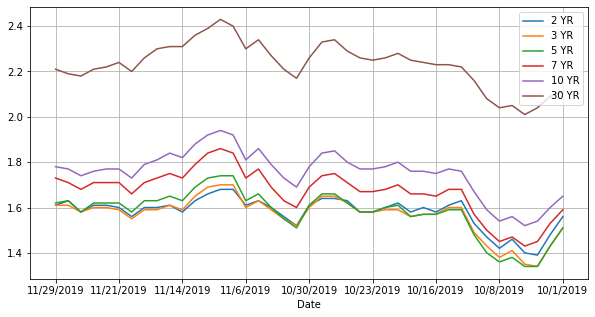

In [54]:
BENCHMARK_6_US_TREASURIES.set_index('Date').plot(figsize=(10,5), grid=True)

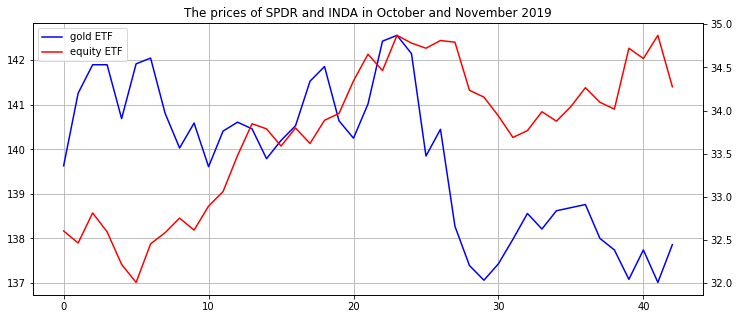

In [55]:
plt.figure(figsize=(12,5))
plt.title('The prices of SPDR and INDA in October and November 2019')

ax1 = SPDR_GOLD_EXCH_TR_FUN["Adjested_Prices"].plot(color='blue', grid=True, label='gold ETF')
ax2 = EQUITY_ETF_INDIA["Adj Close"].plot(color='red', grid=True, secondary_y=True, label='equity ETF')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)
plt.show()

NelsonSiegelSvenssonCurve(beta0=2.6300293475329353, beta1=-0.6945837785566318, beta2=-1.3184452879773723, beta3=-2.0185120076272987, tau1=1.628439561686288, tau2=5.172339886727206)


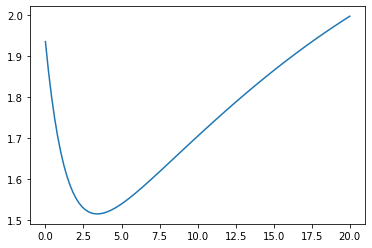

NelsonSiegelSvenssonCurve(beta0=41.02725003147824, beta1=-39.206913000569344, beta2=-18.87336284365251, beta3=-101.13401878007282, tau1=5.045027600792372, tau2=22.983292573748034)


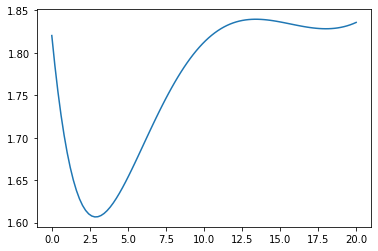

In [56]:
t =np.array([2.0,3.0,5.0,7.0,10.0,30.0])
#avarage yield rate for October 
y = np.array([1.551,1.527,1.525,1.614,1.701,2.18])

curve_fit, status = calibrate_nss_ols(t,y)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,t)
NSS_ZC

Oct_curve, status = calibrate_nss_ols(t,NSS_ZC)
assert status.success
print(Oct_curve)

t = np.linspace(0,20,100)
plt.plot(t,Oct_curve(t))
plt.show()

#avarage yield rate for November 
t =np.array([2.0,3.0,5.0,7.0,10.0,30.0])
y = np.array([1.616,1.618,1.641,1.736,1.811,2.276])

curve_fit, status = calibrate_nss_ols(t,y)
NSS_ZC = NelsonSiegelSvenssonCurve.zero(curve_fit,t)
NSS_ZC

Nov_curve, status = calibrate_nss_ols(t,NSS_ZC)
assert status.success
print(Nov_curve)

t = np.linspace(0,20,100)
plt.plot(t,Nov_curve(t))
plt.show()

In [ ]:
#Financial models

In [57]:

def get_data(df, month, column):
    return df[(df.index >= f"2019-{month:02d}-01") & (df.index < f"2019-{(month+1):02d}-01")][column]

In [58]:
#ARIMA MODEL
def fit_arima(data):
    model = ARIMA(data, order=(3,0,3))
    model_fit = model.fit()
    print(model_fit.summary())
    residuals = pd.DataFrame(model_fit.resid)
    ax1 = residuals.plot(label='residual')
    plt.title("Residuals during the month")
    ax1.get_legend().remove()
    plt.show()
    ax2 = residuals.plot(kind='kde')
    plt.title("Kernel density estimation of the residuals")
    ax2.get_legend().remove()
    plt.show()

In [59]:
df_name = {0: "gold ETF", 1: "equity ETF"}
month_name = {10: "October", 11: "November"}
for index, df in enumerate([SPDR_GOLD_EXCH_TR_FUN, EQUITY_ETF_INDIA]):
    for month in [10, 11]:
        print("-" * 78)
        print("-" * 78)
        print("-" * 78)
        print(f"ARMA model for {df_name[index]} in {month_name[month]}")
        data = get_data(df, month, "Adjusted_Prices")
        fit_arima(data)

------------------------------------------------------------------------------
------------------------------------------------------------------------------
------------------------------------------------------------------------------
ARMA model for gold ETF in October


TypeError: Invalid comparison between dtype=int64 and str

In [60]:
#Volatility

In [61]:
def fit_garch(data):
    garch = arch.arch_model(data, vol='garch', p=1, o=0, q=1)
    garch_fitted = garch.fit()
    print(garch_fitted.summary())

In [62]:
for index, df in enumerate([SPDR_GOLD_EXCH_TR_FUN, EQUITY_ETF_INDIA]):
    for month in [10, 11]:
        print("-" * 8)
        print("-" * 8)
        print("-" * 8)
        print(f"GARCH model for {df_name[index]} in {month_name[month]}")
        data = get_data(df, month, "Daily Return")
        data = data.dropna()
        fit_garch(data)

--------
--------
--------
GARCH model for gold ETF in October


TypeError: Invalid comparison between dtype=int64 and str

In [63]:
#Colleration

In [64]:
#October correlation

In [65]:
corr_oct = stats.pearsonr(SPDR_GOLD_EXCH_TR_FUN[("2019-10-01" < SPDR_GOLD_EXCH_TR_FUN.index) & (SPDR_GOLD_EXCH_TR_FUN.index < "2019-11-01")]["Daily Return"], EQUITY_ETF_INDIA[("2019-10-01" < EQUITY_ETF_INDIA.index) & (EQUITY_ETF_INDIA.index < "2019-11-01")]["Daily Return"])[0]
print(f"The correlation of gold and equity ETFs in October is {corr_oct}")

TypeError: Invalid comparison between dtype=int64 and str

In [66]:
#November correlation

In [67]:
corr_nov = stats.pearsonr(SPDR_GOLD_EXCH_TR_FUN[SPDR_GOLD_EXCH_TR_FUN.index >= "2019-11-01"]["Daily Return"], EQUITY_ETF_INDIA[EQUITY_ETF_INDIA.index >= "2019-11-01"]["Daily Return"])[0]
print(f"The correlation of gold and equity ETFs in November is {corr_nov}")

TypeError: Invalid comparison between dtype=int64 and str